<a href="https://colab.research.google.com/github/semaHbo/ev-enerji-tahmini/blob/main/Model_Training/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Temizlenmiş ve ölçeklenmiş veri seti üzerinden, Linear Regression modeli eğiterek
Enerji_Tuketimi değerleri tahmin edilecek

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
train_path = '/content/drive/MyDrive/ev-enerji-tahmini/train1_scaled_cleaned.csv'
val_path = '/content/drive/MyDrive/ev-enerji-tahmini/val1_scaled_cleaned.csv'

train_df = pd.read_csv(train_path, index_col='date', parse_dates=True)
val_df = pd.read_csv(val_path, index_col='date', parse_dates=True)

print("Train veri şekli:", train_df.shape)
print("Validation veri şekli:", val_df.shape)


Mounted at /content/drive
Train veri şekli: (13813, 31)
Validation veri şekli: (2958, 31)


In [3]:
# X: Bağımsız değişkenler, y: Hedef değişken
X_train = train_df.drop(columns=['Enerji_Tuketimi'])
y_train = train_df['Enerji_Tuketimi']

X_val = val_df.drop(columns=['Enerji_Tuketimi'])
y_val = val_df['Enerji_Tuketimi']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (13813, 30)
y_train shape: (13813,)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Model oluşturma
lr_model = LinearRegression()

# Modeli eğitme
lr_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = lr_model.predict(X_val)


In [5]:
# MAE
mae = mean_absolute_error(y_val, y_pred)

# MSE
mse = mean_squared_error(y_val, y_pred)

# RMSE
rmse = np.sqrt(mse)

# R-kare
r2 = r2_score(y_val, y_pred)

# Sonuçlar
print(f" Linear Regression Model Performansı (Validation Seti)")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


 Linear Regression Model Performansı (Validation Seti)
MAE  : 53.5226
MSE  : 8983.9791
RMSE : 94.7839
R²   : 0.1081


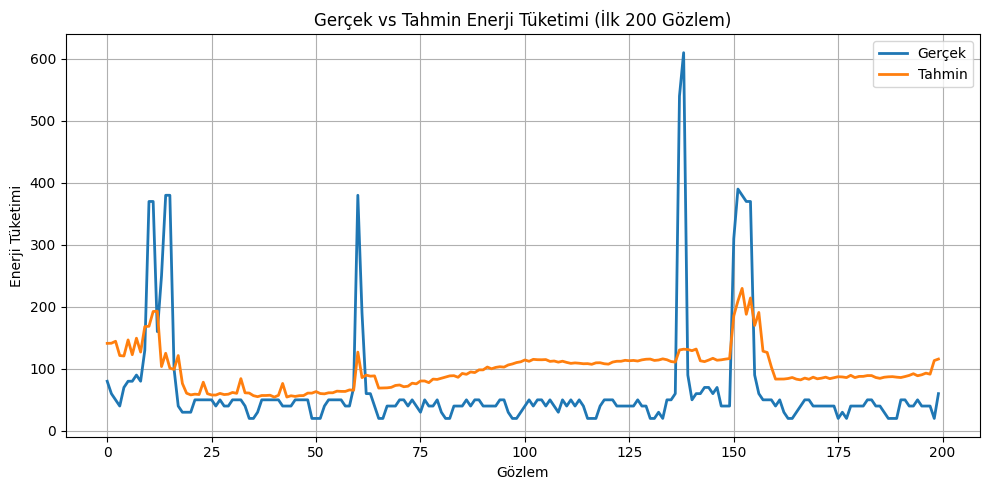

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_val.values[:200], label="Gerçek", linewidth=2)
plt.plot(y_pred[:200], label="Tahmin", linewidth=2)
plt.title("Gerçek vs Tahmin Enerji Tüketimi (İlk 200 Gözlem)")
plt.xlabel("Gözlem")
plt.ylabel("Enerji Tüketimi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
